In [2]:
#pip3 install -U scikit-learn scipy matplotlib

import pandas as pd
import numpy as np
#import sweetviz as sv



In [3]:
datecolumns = ['LicenceDate', 'ConfidentialReleaseDate','AbandonDate', 'SurfAbandonDate', 'SpudDate', 'FinalDrillDate', 'RigReleaseDate','StatusDate','CompletionDate']   
well_header = pd.read_csv(r"data\WellHeader_Datathon.csv",parse_dates=datecolumns, low_memory=False, na_values='Not Applicable')
well_production = pd.read_csv(r"data\WellProduction.csv", parse_dates=['ProdPeriod'])
perf_treatment = pd.read_csv(r"data\PerfTreatments.csv", parse_dates=['ActivityDate'])

In [4]:
well_header=well_header.iloc[:,0:85]
well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EPAssetsId                 10437 non-null  int64         
 1   Province                   10437 non-null  object        
 2   LicenceNumber              10437 non-null  object        
 3   UWI                        10437 non-null  object        
 4   CurrentOperator            10437 non-null  object        
 5   CurrentOperatorParent      10437 non-null  int64         
 6   CurrentOperatorParentName  10437 non-null  object        
 7   Licensee                   10437 non-null  object        
 8   LicenseeParentCompany      10437 non-null  int64         
 9   LicenseeParentCompanyName  10437 non-null  object        
 10  LicenceDate                10437 non-null  datetime64[ns]
 11  CurrentStatus              10437 non-null  object        
 12  Curr

In [5]:

display(well_production.info())

print('\n')

perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EPAssetsId        961054 non-null  int64         
 1   ProdPeriod        961054 non-null  datetime64[ns]
 2   ProdType          961054 non-null  object        
 3   Volume            961054 non-null  float64       
 4   WellHeader.Match  961054 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 36.7+ MB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  object        
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
 8   WellHeader.Match   445271 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 30.6+ MB


In [6]:
well_header.head(2)

,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,...,PSACAreaCode,PSACAreaName,ProjectedDepth,StatusDate,StatusSource,UnitID,UnitName,UnitFlag,Municipality,CompletionDate
0,2587301,Alberta,475898,100122706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AB2,Foothills Front,3800.0,2016-02-28,AER,NaN,NaN,No,NaN,NaT
1,2593278,Alberta,479407,102052706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AB2,Foothills Front,3700.0,2016-09-23,AER,NaN,NaN,No,NaN,NaT


In [7]:
##check which columns are object datatypes 

well_header.columns[well_header.dtypes == 'object']

Index(['Province', 'LicenceNumber', 'UWI', 'CurrentOperator',
       'CurrentOperatorParentName', 'Licensee', 'LicenseeParentCompanyName',
       'CurrentStatus', 'CurrentStatusStandardised', 'WellType',
       'WellTypeStandardised', 'WellName', 'Formation', 'Field', 'Pool',
       'SurveySystem', 'Surf_Location', 'Surf_Meridian', 'Surf_TownshipRange',
       'Surf_QuarterUnit', 'Surf_Block', 'Surf_NTSMapSheet', 'Surf_Area',
       'Surf_QuarterSection', 'BH_Location', 'BH_TownshipRange',
       'BH_QuarterUnit', 'BH_Block', 'BH_NTSMapSheet', 'BH_Area',
       'BH_QuarterSection', 'BH_Meridian', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'DrillingContractor', 'WellProfile',
       'Country', 'RegulatoryAgency', 'PSACAreaCode', 'PSACAreaName',
       'StatusSource', 'UnitID', 'UnitName', 'UnitFlag', 'Municipality'],
      dtype='object')

In [8]:
## Select objects to convert to category type 
obj_cast_category = ['Province', 'CurrentOperator', 'CurrentOperatorParentName',
       'Licensee', 'LicenseeParentCompanyName', 'CurrentStatus',
       'CurrentStatusStandardised', 'WellType', 'WellTypeStandardised',
       'Formation', 'Field', 'Pool', 'SurveySystem',
       'Surf_Meridian', 
       'Surf_QuarterUnit',  'Surf_Block', 'Surf_NTSMapSheet',
       'Surf_Area',  'Surf_QuarterSection',
       'BH_Location', 'BH_QuarterUnit', 
       'BH_Block', 'BH_NTSMapSheet', 'BH_Area', 
       'BH_QuarterSection', 'BH_Meridian', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'OSDeposit', 'DrillingContractor',
       'WellProfile', 'Country', 'RegulatoryAgency', 'PSACAreaCode',
       'PSACAreaName', 'StatusSource', 'UnitFlag','Municipality']       


well_header[obj_cast_category] = well_header[obj_cast_category].astype('category')

well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EPAssetsId                 10437 non-null  int64         
 1   Province                   10437 non-null  category      
 2   LicenceNumber              10437 non-null  object        
 3   UWI                        10437 non-null  object        
 4   CurrentOperator            10437 non-null  category      
 5   CurrentOperatorParent      10437 non-null  int64         
 6   CurrentOperatorParentName  10437 non-null  category      
 7   Licensee                   10437 non-null  category      
 8   LicenseeParentCompany      10437 non-null  int64         
 9   LicenseeParentCompanyName  10437 non-null  category      
 10  LicenceDate                10437 non-null  datetime64[ns]
 11  CurrentStatus              10437 non-null  category      
 12  Curr

In [9]:

##create list of columns to be dropped

dropcols_wellheader= ['CompletionDate','UnitID', 'UnitFlag', 'UnitName', 'Confidential', 'RegulatoryAgency', 'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'OSArea', 'OSDeposit', 'Municipality', 'CurrentStatus']

print('well columns to drop as follows:' + ' ')
print(dropcols_wellheader)

well columns to drop as follows: 
['CompletionDate', 'UnitID', 'UnitFlag', 'UnitName', 'Confidential', 'RegulatoryAgency', 'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'OSArea', 'OSDeposit', 'Municipality', 'CurrentStatus']


In [10]:
## drop columns selected
well_header_df = well_header.drop(columns=dropcols_wellheader, axis=1, inplace=False)

## Check number of rows and columns
well_header_df.shape

(10437, 72)

In [11]:
well_header_df.to_csv("well_header_df.csv")

In [12]:
well_header_df1=well_header_df[['EPAssetsId','CurrentStatus','WellType','LicenceDate','ConfidentialReleaseDate','AbandonDate', 'SurfAbandonDate', 'DaysDrilling','StatusDate','CompletionDate']].copy()

KeyError: "['SurfAbandonDate', 'AbandonDate', 'CompletionDate', 'CurrentStatus', 'ConfidentialReleaseDate'] not in index"

In [13]:
well_header_df1=well_header.filter(['EPAssetsId','CurrentStatus','WellType','LicenceDate','ConfidentialReleaseDate','AbandonDate', 'SurfAbandonDate', 'DaysDrilling','StatusDate','CompletionDate'], axis=1)
well_header_df1

,EPAssetsId,CurrentStatus,WellType,LicenceDate,ConfidentialReleaseDate,AbandonDate,SurfAbandonDate,DaysDrilling,StatusDate,CompletionDate
0,2587301,Gas Lift,Crude Oil,2015-06-25,NaT,NaT,NaT,13.0,2016-02-28,NaT
1,2593278,Gas Lift,Crude Oil,2016-05-06,NaT,NaT,NaT,13.0,2016-09-23,NaT
2,2579437,Gas Lift,Crude Oil,2014-08-14,NaT,NaT,NaT,13.0,2015-11-24,NaT
3,2591761,Gas Lift,Crude Oil,2016-01-11,NaT,NaT,NaT,12.0,2016-02-17,NaT
4,2587302,Gas Lift,Crude Oil,2015-06-26,NaT,NaT,NaT,11.0,2016-02-21,NaT
...,...,...,...,...,...,...,...,...,...,...
10432,2619592,Pumping,Crude Oil,2019-01-23,NaT,NaT,NaT,16.0,2019-03-13,NaT
10433,2621490,Pumping,Crude Oil,2019-06-19,NaT,NaT,NaT,45.0,2019-09-07,NaT
10434,2614697,Pumping,Crude Oil,2018-07-03,NaT,NaT,NaT,10.0,2018-11-13,NaT
10435,2613170,Pumping,Crude Oil,2018-06-07,NaT,NaT,NaT,7.0,2018-10-29,NaT


In [14]:
new = old.filter(['A','B','D'], axis=1)

NameError: name 'old' is not defined

In [15]:
# change ProdType and ActivityType columns from object to category datatype
well_production['ProdType'] = well_production['ProdType'].astype('category')
perf_treatment['ActivityType'] = perf_treatment['ActivityType'].astype('category')

In [16]:

well_production=well_production.iloc[:,0:4]

In [17]:

well_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  category      
 3   Volume      961054 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 22.9 MB


In [18]:
well_production['date'] = pd.to_datetime(well_production.ProdPeriod)
well_production
#production.loc[:,'date'] = pd.to_datetime(production.prodperiod)

,EPAssetsId,ProdPeriod,ProdType,Volume,date
0,1159612,2019-12-31,Production Hours,744.000000,2019-12-31
1,1166272,2019-12-31,Production Hours,744.000000,2019-12-31
2,1172352,2019-12-31,Production Hours,744.000000,2019-12-31
3,1152904,2019-12-31,Production Hours,744.000000,2019-12-31
4,1160926,2019-12-31,Production Hours,744.000000,2019-12-31
...,...,...,...,...,...
961049,1151520,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30
961050,1149672,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30
961051,1163020,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30
961052,1169431,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30


In [19]:
## add year and month column to the well production data 

well_production['Year'] = well_production['ProdPeriod'].dt.year

well_production['Month'] = well_production['ProdPeriod'].dt.month

well_production['Month_Name'] = well_production['ProdPeriod'].dt.month_name()
well_production

,EPAssetsId,ProdPeriod,ProdType,Volume,date,Year,Month,Month_Name
0,1159612,2019-12-31,Production Hours,744.000000,2019-12-31,2019,12,December
1,1166272,2019-12-31,Production Hours,744.000000,2019-12-31,2019,12,December
2,1172352,2019-12-31,Production Hours,744.000000,2019-12-31,2019,12,December
3,1152904,2019-12-31,Production Hours,744.000000,2019-12-31,2019,12,December
4,1160926,2019-12-31,Production Hours,744.000000,2019-12-31,2019,12,December
...,...,...,...,...,...,...,...,...
961049,1151520,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30,2019,11,November
961050,1149672,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30,2019,11,November
961051,1163020,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30,2019,11,November
961052,1169431,2019-11-30,Gas Production (MMcf),0.010594,2019-11-30,2019,11,November


In [20]:
# check for number of duplicates in the original production dataframe before pivoting
def check_duplicates_in_wellproduction(ProdType):
    x = well_production[well_production['ProdType']== ProdType]
    y = x[x.duplicated(subset=['EPAssetsId', "ProdPeriod"])]
    print(y['EPAssetsId'].nunique())

duplicate_values_for_gas_production = check_duplicates_in_wellproduction('Gas Production (MMcf)')
print('\n')
duplicate_values_for_prod_hrs = check_duplicates_in_wellproduction('Production Hours')
print('\n')
duplicate_values_for_oil_production = check_duplicates_in_wellproduction('Oil Production (Bbls)')
print('\n')
duplicate_values_for_water_production = check_duplicates_in_wellproduction('Water Production (Bbls)')
print('\n')
duplicate_values_for_condensate_production = check_duplicates_in_wellproduction('Condensate Production (Bbls)')

317


440


378


281


0


In [21]:
# create separate dataframe for production hours
prod_hrs_data = well_production[well_production['ProdType']== 'Production Hours']
prod_hrs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279435 entries, 0 to 319035
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  279435 non-null  int64         
 1   ProdPeriod  279435 non-null  datetime64[ns]
 2   ProdType    279435 non-null  category      
 3   Volume      279435 non-null  float64       
 4   date        279435 non-null  datetime64[ns]
 5   Year        279435 non-null  int64         
 6   Month       279435 non-null  int64         
 7   Month_Name  279435 non-null  object        
dtypes: category(1), datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 17.3+ MB


In [22]:
## groupby original production table 
new_production_table = well_production.groupby(by=['EPAssetsId', 'ProdType', 'Year', 'Month', 'Month_Name'],as_index=False, observed=True).agg({'ProdPeriod':'max', 'Volume': 'sum'}) 

new_production_table.info()
new_production_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959619 entries, 0 to 959618
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  959619 non-null  int64         
 1   ProdType    959619 non-null  category      
 2   Year        959619 non-null  int64         
 3   Month       959619 non-null  int64         
 4   Month_Name  959619 non-null  object        
 5   ProdPeriod  959619 non-null  datetime64[ns]
 6   Volume      959619 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 52.2+ MB


,EPAssetsId,ProdType,Year,Month,Month_Name,ProdPeriod,Volume
0,3373,Production Hours,2017,8,August,2017-08-31,60.000000
1,3373,Production Hours,2017,9,September,2017-09-30,499.200000
2,3373,Production Hours,2017,10,October,2017-10-31,417.600000
3,3373,Production Hours,2017,11,November,2017-11-30,619.200000
4,3373,Production Hours,2017,12,December,2017-12-31,662.400000
...,...,...,...,...,...,...,...
959614,2625202,Gas Production (MMcf),2019,12,December,2019-12-31,27.616174
959615,2625202,Gas Production (MMcf),2020,1,January,2020-01-31,59.600788
959616,2625908,Production Hours,2020,1,January,2020-01-31,148.000000
959617,2625908,Oil Production (Bbls),2020,1,January,2020-01-31,1430.300520


In [23]:
new_production_pivot= new_production_table.pivot_table(index=['EPAssetsId', 'Year', 'Month','ProdPeriod'], columns='ProdType', values='Volume', aggfunc=np.sum, observed=True)
new_production_pivot

ProdType                          Condensate Production (Bbls)  \
EPAssetsId Year Month ProdPeriod                                 
3373       2017 8     2017-08-31                           NaN   
                9     2017-09-30                    3744.94692   
                10    2017-10-31                    3792.12042   
                11    2017-11-30                    5577.16566   
                12    2017-12-31                    4994.73018   
...                                                        ...   
2624467    2020 1     2020-01-31                           NaN   
2624624    2020 1     2020-01-31                           NaN   
2625202    2019 12    2019-12-31                           NaN   
           2020 1     2020-01-31                           NaN   
2625908    2020 1     2020-01-31                           NaN   

ProdType                          Gas Production (MMcf)         \
EPAssetsId Year Month ProdPeriod                                 
3373       2017 8     2017-08-31                      2.330777   
                9     2017-09-30                     55.009864   
                10    2017-10-31                     48.999285   
                11    2017-11-30                     58.516624   
                12    2017-12-31                     77.385321   
...                                                        ...   
2624467    2020 1     2020-01-31                      4.114174   
2624624    2020 1     2020-01-31                     11.297205   
2625202    2019 12    2019-12-31                     27.616174   
           2020 1     2020-01-31                     59.600788   
2625908    2020 1     2020-01-31                      0.017657   

ProdType                          Oil Production (Bbls)         \
EPAssetsId Year Month ProdPeriod                                 
3373       2017 8     2017-08-31                           NaN   
                9     2017-09-30                           NaN   
                10    2017-10-31                           NaN   
                11    2017-11-30                           NaN   
                12    2017-12-31                           NaN   
...                                                        ...   
2624467    2020 1     2020-01-31                    2661.21438   
2624624    2020 1     2020-01-31                    6781.03338   
2625202    2019 12    2019-12-31                    5084.67432   
           2020 1     2020-01-31                    9234.05538   
2625908    2020 1     2020-01-31                    1430.30052   

ProdType                          Production Hours              \
EPAssetsId Year Month ProdPeriod                                 
3373       2017 8     2017-08-31                          60.0   
                9     2017-09-30                         499.2   
                10    2017-10-31                         417.6   
                11    2017-11-30                         619.2   
                12    2017-12-31                         662.4   
...                                                        ...   
2624467    2020 1     2020-01-31                           NaN   
2624624    2020 1     2020-01-31                         262.0   
2625202    2019 12    2019-12-31                           NaN   
           2020 1     2020-01-31                           NaN   
2625908    2020 1     2020-01-31                         148.0   

ProdType                          Water Production (Bbls)       
EPAssetsId Year Month ProdPeriod                                
3373       2017 8     2017-08-31                           NaN  
                9     2017-09-30                    2213.38062  
                10    2017-10-31                    2327.22600  
                11    2017-11-30                    2127.21036  
                12    2017-12-31                    2403.96156  
...                                                        ...  
2624467    2020 1     2020-01-31            

In [24]:
new_production_tablexx = well_production.groupby(by=['EPAssetsId'],as_index=False, observed=True).agg({'ProdPeriod':'max', 'Volume': 'sum'}) 

#new_production_tablexx.info()
new_production_tablexx

,EPAssetsId,ProdPeriod,Volume
0,3373,2019-12-31,92643.249162
1,6976,2019-12-31,77333.089617
2,6977,2019-12-31,67975.800087
3,7129,2019-12-31,43565.199910
4,7130,2019-12-31,44459.540724
...,...,...,...
10381,2624400,2020-01-31,403.330145
10382,2624467,2020-01-31,11247.131674
10383,2624624,2020-01-31,7054.330585
10384,2625202,2020-01-31,14405.946662


In [25]:
# create new dataframe with Total Production for each well
production_pivot_total_eachwell = new_production_table.pivot_table(index=['EPAssetsId'], columns='ProdType', values='Volume', aggfunc=np.sum, observed=True)


production_pivot_total_eachwell.head()

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
3373,48923.32236,1627.348362,NaN,17450.4,24642.17844
6976,4753.83084,1358.849937,NaN,31180.8,40039.60884
6977,5082.15840,2767.624407,NaN,30981.6,29144.41728
7129,116.36130,1706.372290,NaN,17536.8,24205.66632
7130,164.79276,2554.319484,NaN,20496.0,21244.42848


In [26]:
production_pivot_total_eachwell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 3373 to 2625908
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  2924 non-null   float64
 1   Gas Production (MMcf)         10374 non-null  float64
 2   Oil Production (Bbls)         6978 non-null   float64
 3   Production Hours              10196 non-null  float64
 4   Water Production (Bbls)       7254 non-null   float64
dtypes: float64(5)
memory usage: 486.8 KB


In [27]:
production_pivot_total_eachwell.shape()

TypeError: 'tuple' object is not callable

In [28]:
production_pivot_total_eachwell['Condensate Production (Bbls)']

EPAssetsId
3373       48923.32236
6976        4753.83084
6977        5082.15840
7129         116.36130
7130         164.79276
              ...     
2624400       37.73880
2624467            NaN
2624624            NaN
2625202            NaN
2625908            NaN
Name: Condensate Production (Bbls), Length: 10386, dtype: float64

In [29]:
production_pivot_total_eachwell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 3373 to 2625908
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  2924 non-null   float64
 1   Gas Production (MMcf)         10374 non-null  float64
 2   Oil Production (Bbls)         6978 non-null   float64
 3   Production Hours              10196 non-null  float64
 4   Water Production (Bbls)       7254 non-null   float64
dtypes: float64(5)
memory usage: 486.8 KB


In [30]:
# check if row has an unique index
production_pivot_total_eachwell.index.is_unique

True

In [31]:
# check if index values has duplicates
production_pivot_total_eachwell.index.has_duplicates

False

In [32]:
well_production1=well_production.loc[ : , ['EPAssetsId', 'ProdPeriod', 'ProdType', 'Volume'] ]
well_production1

,EPAssetsId,ProdPeriod,ProdType,Volume
0,1159612,2019-12-31,Production Hours,744.000000
1,1166272,2019-12-31,Production Hours,744.000000
2,1172352,2019-12-31,Production Hours,744.000000
3,1152904,2019-12-31,Production Hours,744.000000
4,1160926,2019-12-31,Production Hours,744.000000
...,...,...,...,...
961049,1151520,2019-11-30,Gas Production (MMcf),0.010594
961050,1149672,2019-11-30,Gas Production (MMcf),0.010594
961051,1163020,2019-11-30,Gas Production (MMcf),0.010594
961052,1169431,2019-11-30,Gas Production (MMcf),0.010594


In [34]:
perf_treatment=perf_treatment.iloc[:,0:8]

In [35]:

perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  category      
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.2 MB


In [36]:

perf_treatment['ActivityType'].unique()

['Perforation', 'Fracture', 'Hydraulic Fracture', 'Sand Fracture', 'Open Hole', ..., 'Packing Device Capped w/Cement', 'Chemical Squeeze', 'Casing Patch', 'Acid Treatment', 'Multi-Stage Fracture']
Length: 26
Categories (25, object): ['Perforation', 'Fracture', 'Hydraulic Fracture', 'Sand Fracture', ..., 'Chemical Squeeze', 'Casing Patch', 'Acid Treatment', 'Multi-Stage Fracture']

In [37]:
perf_treatment1=perf_treatment.loc[ :,['EPAssetsId', 'ActivityDate', 'ActivityType', 'PerfShots'] ]
perf_treatment1

,EPAssetsId,ActivityDate,ActivityType,PerfShots
0,2598013,2017-01-19,Perforation,20.0
1,2599020,2017-01-18,Perforation,20.0
2,2585063,2015-02-14,Perforation,20.0
3,2589680,2015-11-08,Perforation,20.0
4,2590441,2016-08-09,Perforation,20.0
...,...,...,...,...
445266,2588444,2015-09-13,Multi-Stage Fracture,0.0
445267,2609973,2018-02-18,Multi-Stage Fracture,0.0
445268,2600493,2017-09-16,Multi-Stage Fracture,0.0
445269,2595389,2016-09-12,Multi-Stage Fracture,0.0


In [38]:
perf_treatment1['ActivityType']

0                  Perforation
1                  Perforation
2                  Perforation
3                  Perforation
4                  Perforation
                  ...         
445266    Multi-Stage Fracture
445267    Multi-Stage Fracture
445268    Multi-Stage Fracture
445269    Multi-Stage Fracture
445270    Multi-Stage Fracture
Name: ActivityType, Length: 445271, dtype: category
Categories (25, object): ['Acid Squeeze', 'Acid Treatment', 'Acid Wash', 'Acidize', ..., 'Remedial', 'Remedial Casing Cementing', 'Sand Fracture', 'Slotted Liner']

In [39]:
perf_plot=perf_treatment1.groupby(['EPAssetsId','ActivityType']).count().reset_index(level=1).sort_values('ActivityDate',ascending=[False])
perf_plot.sample(10)


,ActivityType,ActivityDate,PerfShots
EPAssetsId,,,
1166803,Cement Squeeze,NaN,NaN
1168966,Bridge Plug - No Cement,NaN,NaN
1170342,Chemical Fracture,NaN,NaN
2606733,Sand Fracture,NaN,NaN
2607464,Multi-Stage Fracture,40.0,40.0
2591931,Sand Fracture,NaN,NaN
2591745,Packing Device Capped w/Cement,NaN,NaN
2609563,Remedial Casing Cementing,NaN,NaN
1170079,Fracture,NaN,NaN


In [40]:
perf_plot2=perf_plot.reset_index()
#perf_plot2['ActivityDate'].fillna(0,inplace=True)
#perf_plot2['PerfShots'].fillna(0,inplace=True)
perf_plot2.reset_index()
perf_plot4=perf_plot2.dropna().sort_values('ActivityDate',ascending=[False])
perf_plot4.sample(10)


,EPAssetsId,ActivityType,ActivityDate,PerfShots
4368,2596151,Multi-Stage Fracture,30.0,30.0
13714,2597919,Perforation,1.0,1.0
9333,1165389,Sand Fracture,2.0,0.0
10931,1160573,Hydraulic Fracture,1.0,0.0
4824,42443,Fracture,28.0,0.0
1693,2602553,Multi-Stage Fracture,54.0,54.0
9059,1171726,Hydraulic Fracture,2.0,0.0
2366,41471,Fracture,42.0,0.0
14203,1166954,Sand Fracture,1.0,0.0
4131,2618358,Fracture,31.0,31.0


In [41]:
perf_plot5=perf_plot4.sort_values('ActivityDate',ascending=[False])
perf_plot5

,EPAssetsId,ActivityType,ActivityDate,PerfShots
0,2600761,Perforation,618.0,618.0
1,2601039,Perforation,604.0,604.0
2,2597868,Perforation,601.0,601.0
3,2597875,Perforation,586.0,586.0
4,2603285,Perforation,581.0,581.0
...,...,...,...,...
15169,1168911,Sand Fracture,1.0,0.0
15170,1168910,Sand Fracture,1.0,0.0
15171,1168908,Hydraulic Fracture,1.0,0.0
15163,1168956,Hydraulic Fracture,1.0,0.0


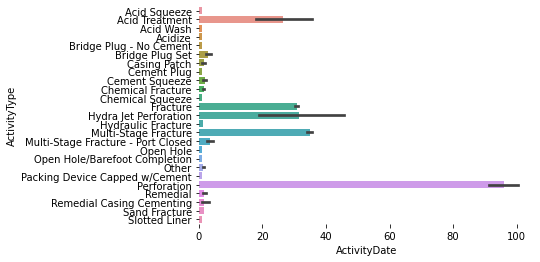

In [44]:
import seaborn as sns
import matplotlib.pylab as plt

sns.barplot(x='ActivityDate',y='ActivityType', data=perf_plot5)
sns.despine(left=True, bottom=True)

#sns.barplot(x='Id', y="Speed", data=df, order=result['Id'])
#order=df.sort_values('Salary').Education)

In [273]:
## groupby original production table 
perf_pivot_eachwell_10 = perf_plot.groupby(by=['EPAssetsId'],as_index=False, observed=True).agg({'ActivityType':'count','ActivityDate':'count', 'PerfShots': 'sum'})

perf_pivot_eachwell_10


,ActivityType,ActivityDate,PerfShots
0,25,2,0.0
1,25,2,0.0
2,25,2,0.0
3,25,3,0.0
4,25,3,0.0
...,...,...,...
10103,25,1,44.0
10104,25,1,41.0
10105,25,1,45.0
10106,25,2,26.0


In [274]:
## groupby original production table 
perf_pivot_eachwell_10 = perf_plot.groupby(by=['EPAssetsId'],as_index=True, observed=True).agg({'ActivityType':'count','ActivityDate':'count', 'PerfShots': 'sum'})

perf_pivot_eachwell_10


,ActivityType,ActivityDate,PerfShots
EPAssetsId,,,
3373,25,2,0.0
6976,25,2,0.0
6977,25,2,0.0
7129,25,3,0.0
7130,25,3,0.0
...,...,...,...
2624626,25,1,44.0
2624627,25,1,41.0
2624628,25,1,45.0


In [295]:
perf3=perf_pivot_eachwell_10.reset_index()
perf3

,EPAssetsId,ActivityType,ActivityDate,PerfShots
0,3373,25,2,0.0
1,6976,25,2,0.0
2,6977,25,2,0.0
3,7129,25,3,0.0
4,7130,25,3,0.0
...,...,...,...,...
10103,2624626,25,1,44.0
10104,2624627,25,1,41.0
10105,2624628,25,1,45.0
10106,2624670,25,2,26.0


In [299]:
perf4=perf3.drop(['EPAssetsId','ActivityType', 'ActivityDate'], axis=1)
#g2.drop(g2.columns[0], axis=1)
perf4

,PerfShots
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10103,44.0
10104,41.0
10105,45.0
10106,26.0


In [46]:
perf_plot5

,EPAssetsId,ActivityType,ActivityDate,PerfShots
0,2600761,Perforation,618.0,618.0
1,2601039,Perforation,604.0,604.0
2,2597868,Perforation,601.0,601.0
3,2597875,Perforation,586.0,586.0
4,2603285,Perforation,581.0,581.0
...,...,...,...,...
15169,1168911,Sand Fracture,1.0,0.0
15170,1168910,Sand Fracture,1.0,0.0
15171,1168908,Hydraulic Fracture,1.0,0.0
15163,1168956,Hydraulic Fracture,1.0,0.0


In [70]:
#perf_plot6=perf_plot5.groupby('ActivityType').ActivityDate. agg(['count','mean','sum','min','max']).reset_index()
perf_plot6=perf_plot5.groupby(["ActivityType"])['ActivityDate']. agg(np.mean).reset_index().sort_values('ActivityDate',ascending=[False])
#'mean','sum','min','max'
perf_plot6

,ActivityType,ActivityDate
20,Perforation,95.887993
14,Multi-Stage Fracture,34.851258
12,Hydra Jet Perforation,31.393443
11,Fracture,30.805609
1,Acid Treatment,26.437500
15,Multi-Stage Fracture - Port Closed,3.400000
5,Bridge Plug Set,2.954545
8,Cement Squeeze,1.800000
22,Remedial Casing Cementing,1.750000
21,Remedial,1.666667


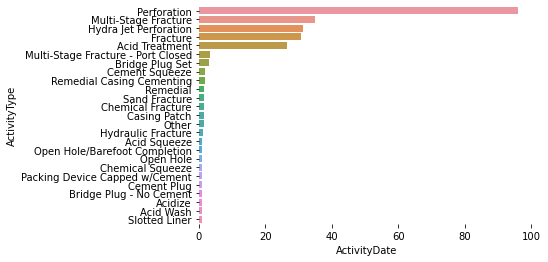

In [73]:
sns.barplot(x='ActivityDate',y='ActivityType', data=perf_plot6, order=perf_plot6['ActivityType'] )
sns.despine(left=True, bottom=True)

<Figure size 842.4x595.44 with 0 Axes>

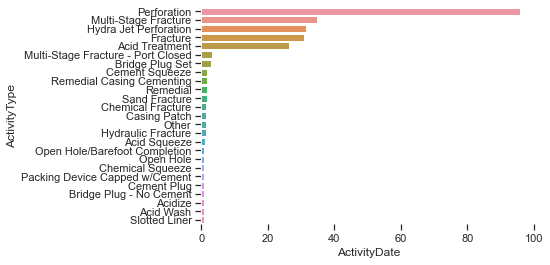

In [98]:
plt.gcf().set_size_inches(11.7, 8.27)
plt.figure()
perf_bar_h1=sns.barplot(x='ActivityDate',y='ActivityType', data=perf_plot6, order=perf_plot6['ActivityType'] )
sns.despine(left=True, bottom=True)
plt.savefig('perf_bar_h1.png')


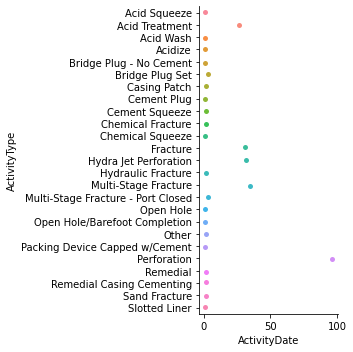

In [75]:
sns.catplot(x="ActivityDate", y="ActivityType", data=perf_plot6);

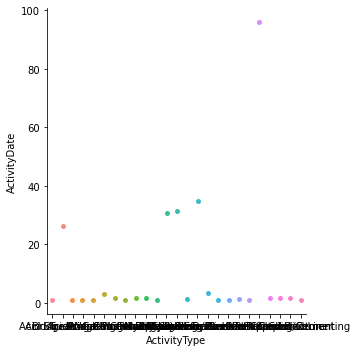

In [76]:
sns.catplot(x="ActivityType", y="ActivityDate", data=perf_plot6);

In [83]:
#perf_plot6=perf_plot5.groupby('ActivityType').ActivityDate. agg(['count','mean','sum','min','max']).reset_index()
perf_plot7=perf_treatment1.groupby(["ActivityType","EPAssetsId"]).count().reset_index(level=1)
#sort_values('ActivityDate',ascending=[False])
perf_plot7

,EPAssetsId,ActivityDate,PerfShots
ActivityType,,,
Acid Squeeze,3373,NaN,NaN
Acid Squeeze,6976,NaN,NaN
Acid Squeeze,6977,NaN,NaN
Acid Squeeze,7129,NaN,NaN
Acid Squeeze,7130,NaN,NaN
...,...,...,...
Slotted Liner,2624626,NaN,NaN
Slotted Liner,2624627,NaN,NaN
Slotted Liner,2624628,NaN,NaN


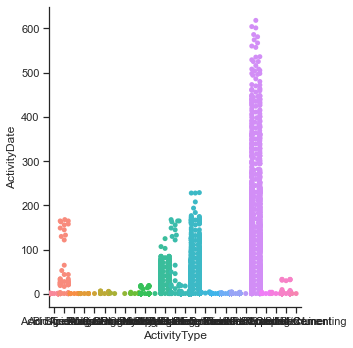

In [87]:
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.catplot(x="ActivityType", y="ActivityDate", kind="swarm", data=perf_plot7.reset_index());

In [94]:
plt.gcf().set_size_inches(11.7, 8.27)

<Figure size 842.4x595.44 with 0 Axes>

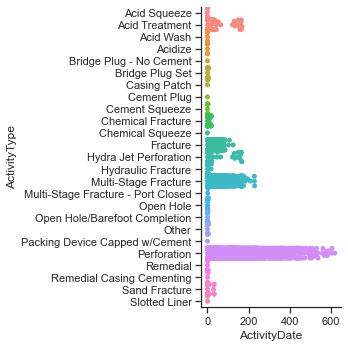

In [90]:
sns.catplot(x="ActivityDate",y="ActivityType", kind="swarm", data=perf_plot7.reset_index());

<Figure size 842.4x595.44 with 0 Axes>

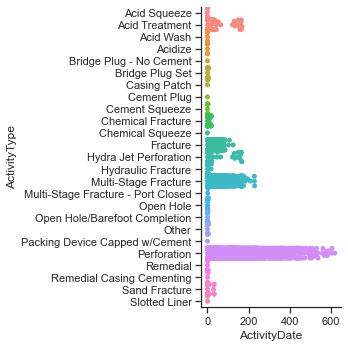

In [95]:
plt.gcf().set_size_inches(11.7, 8.27)
sns.catplot(x="ActivityDate",y="ActivityType", kind="swarm", data=perf_plot7.reset_index());

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 432x288 with 0 Axes>

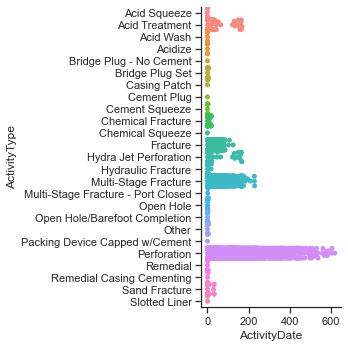

In [97]:
plt.gcf().set_size_inches(11.7, 8.27)
plt.figure()
perf_swarm_h1=sns.catplot(x="ActivityDate",y="ActivityType", kind="swarm", data=perf_plot7.reset_index());
plt.savefig('perf_swarm_h1.png')


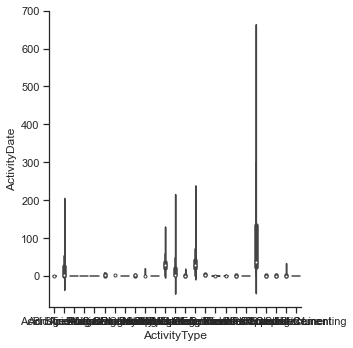

In [88]:
sns.catplot(x="ActivityType", y="ActivityDate", kind="violin", data=perf_plot7.reset_index());

In [ ]:
sns.catplot(x="ActivityDate",y="ActivityType", kind="violin", data=perf_plot7.reset_index());

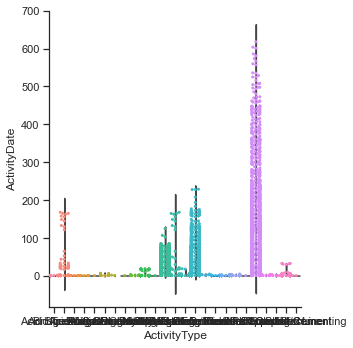

In [89]:
g = sns.catplot(x="ActivityType", y="ActivityDate", kind="violin", inner=None, data=perf_plot7.reset_index())
sns.swarmplot(x="ActivityType", y="ActivityDate", size=3, data=perf_plot7.reset_index(), ax=g.ax);

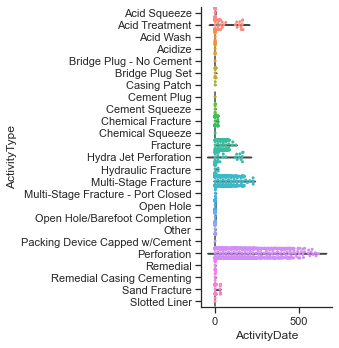

In [92]:
g = sns.catplot(x="ActivityDate",y="ActivityType",  kind="violin", inner=None, data=perf_plot7.reset_index())
sns.swarmplot(x="ActivityDate",y="ActivityType", size=3, data=perf_plot7.reset_index(), ax=g.ax);

<Figure size 842.4x595.44 with 0 Axes>

<Figure size 432x288 with 0 Axes>

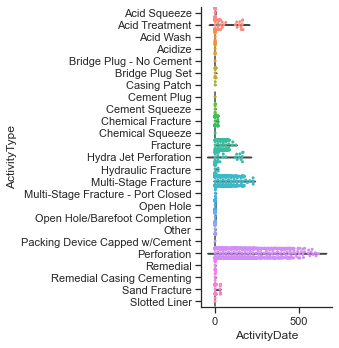

In [99]:
plt.gcf().set_size_inches(11.7, 8.27)
plt.figure()
g = sns.catplot(x="ActivityDate",y="ActivityType",  kind="violin", inner=None, data=perf_plot7.reset_index())
perf_swarm_piano_h1=sns.swarmplot(x="ActivityDate",y="ActivityType", size=3, data=perf_plot7.reset_index(), ax=g.ax);
plt.savefig('perf_swarm_piano_h1.png')

In [109]:
# create new dataframe with PerfTable for each well
perf_pivot_eachwell_1 = perf_plot.pivot_table(index=['EPAssetsId'], columns='ActivityType', values='ActivityDate', aggfunc=np.sum, observed=True)
perf_pivot_eachwell_1

ActivityType,Acid Squeeze,Acid Treatment,Acid Wash,Acidize,Bridge Plug - No Cement,Bridge Plug Set,Casing Patch,Cement Plug,Cement Squeeze,Chemical Fracture,...,Multi-Stage Fracture - Port Closed,Open Hole,Open Hole/Barefoot Completion,Other,Packing Device Capped w/Cement,Perforation,Remedial,Remedial Casing Cementing,Sand Fracture,Slotted Liner
EPAssetsId,,,,,,,,,,,,,,,,,,,,,
3373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
6977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
7129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# create new dataframe with PerfTable for each well
perf_pivot_eachwell_2 = perf_plot.pivot_table(index=['EPAssetsId'], columns={'ActivityType', values='ActivityDate', aggfunc=np.sum, observed=True)
perf_pivot_eachwell_1

In [213]:
perf_pivot_eachwell_1.columns.name = None
perf_pivot_eachwell_1.shape
#perf_pivot_eachwell_1

(10108, 25)

In [277]:
perf_pivot_eachwell_1

,Acid Squeeze,Acid Treatment,Acid Wash,Acidize,Bridge Plug - No Cement,Bridge Plug Set,Casing Patch,Cement Plug,Cement Squeeze,Chemical Fracture,...,Multi-Stage Fracture - Port Closed,Open Hole,Open Hole/Barefoot Completion,Other,Packing Device Capped w/Cement,Perforation,Remedial,Remedial Casing Cementing,Sand Fracture,Slotted Liner
EPAssetsId,,,,,,,,,,,,,,,,,,,,,
3373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
6977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
7129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
#perf_pivot_eachwell_1.info()

In [143]:
print(type(perf_pivot_eachwell_1))

<class 'pandas.core.frame.DataFrame'>


In [278]:
g1=perf_pivot_eachwell_1['Acid Squeeze'].reset_index()
g1.drop(g1.tail(1).index,inplace=True)
gg=g1.reset_index(drop=True)
gg

,EPAssetsId,Acid Squeeze
0,3373,0.0
1,6976,0.0
2,6977,0.0
3,7129,0.0
4,7130,0.0
...,...,...
10102,2624624,0.0
10103,2624626,0.0
10104,2624627,0.0
10105,2624628,0.0


In [285]:
g2=perf_pivot_eachwell_1['Acid Treatment'].reset_index()
g2.drop(g2.tail(1).index,inplace=True)
g2=g2.reset_index(drop=True)
g22=g2.drop(g2.columns[0], axis=1)
g22

,Acid Treatment
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10102,0.0
10103,0.0
10104,0.0
10105,0.0


In [281]:
g3=perf_pivot_eachwell_1['Acid Wash'].reset_index()
g3.drop(g3.tail(1).index,inplace=True)
g3=g3.reset_index(drop=True)
g33=g3.drop(g3.columns[0], axis=1)

In [282]:
g4=perf_pivot_eachwell_1['Acidize'].reset_index()
g4.drop(g4.tail(1).index,inplace=True)
g4=g4.reset_index(drop=True)
g44=g4.drop(g4.columns[0], axis=1)

In [283]:
g5=perf_pivot_eachwell_1['Bridge Plug - No Cement'].reset_index()
g5.drop(g2.tail(1).index,inplace=True)
g5=g5.reset_index(drop=True)
g55=g5.drop(g5.columns[0], axis=1)

g6=perf_pivot_eachwell_1['Bridge Plug Set'].reset_index()
g6.drop(g6.tail(1).index,inplace=True)
g6=g1.reset_index(drop=True)
g66=g6.drop(g6.columns[0], axis=1)

g7=perf_pivot_eachwell_1['Casing Patch'].reset_index()
g7.drop(g7.tail(1).index,inplace=True)
g7=g1.reset_index(drop=True)
g77=g7.drop(g7.columns[0], axis=1)

g8=perf_pivot_eachwell_1['Cement Plug'].reset_index()
g8.drop(g8.tail(1).index,inplace=True)
g8=g8.reset_index(drop=True)
g88=g8.drop(g8.columns[0], axis=1)

g9=perf_pivot_eachwell_1['Cement Squeeze'].reset_index()
g9.drop(g9.tail(1).index,inplace=True)
g9=g9.reset_index(drop=True)
g99=g9.drop(g9.columns[0], axis=1)

g10=perf_pivot_eachwell_1['Chemical Fracture'].reset_index()
g10.drop(g10.tail(1).index,inplace=True)
g10=g10.reset_index(drop=True)
g102=g10.drop(g10.columns[0], axis=1)

g11=perf_pivot_eachwell_1['Chemical Squeeze'].reset_index()
g11.drop(g11.tail(1).index,inplace=True)
g11=g11.reset_index(drop=True)
g112=g11.drop(g11.columns[0], axis=1)

g12=perf_pivot_eachwell_1['Fracture'].reset_index()
g12.drop(g2.tail(1).index,inplace=True)
g12=g12.reset_index(drop=True)
g122=g12.drop(g12.columns[0], axis=1)

g13=perf_pivot_eachwell_1['Hydra Jet Perforation'].reset_index()
g13.drop(g13.tail(1).index,inplace=True)
g13=g13.reset_index(drop=True)
g132=g13.drop(g13.columns[0], axis=1)

g14=perf_pivot_eachwell_1['Hydraulic Fracture'].reset_index()
g14.drop(g14.tail(1).index,inplace=True)
g14=g14.reset_index(drop=True)
g142=g14.drop(g14.columns[0], axis=1)

g15=perf_pivot_eachwell_1['Multi-Stage Fracture'].reset_index()
g15.drop(g15.tail(1).index,inplace=True)
g15=g15.reset_index(drop=True)
g152=g15.drop(g15.columns[0], axis=1)

g16=perf_pivot_eachwell_1['Multi-Stage Fracture - Port Closed'].reset_index()
g16.drop(g16.tail(1).index,inplace=True)
g16=g16.reset_index(drop=True)
g162=g16.drop(g16.columns[0], axis=1)

g17=perf_pivot_eachwell_1['Open Hole'].reset_index()
g17.drop(g17.tail(1).index,inplace=True)
g17=g17.reset_index(drop=True)
g172=g17.drop(g17.columns[0], axis=1)

g18=perf_pivot_eachwell_1['Open Hole/Barefoot Completion'].reset_index()
g18.drop(g18.tail(1).index,inplace=True)
g18=g18.reset_index(drop=True)
g182=g18.drop(g18.columns[0], axis=1)

g19=perf_pivot_eachwell_1['Other'].reset_index()
g19.drop(g19.tail(1).index,inplace=True)
g19=g19.reset_index(drop=True)
g192=g19.drop(g19.columns[0], axis=1)

g20=perf_pivot_eachwell_1['Packing Device Capped w/Cement'].reset_index()
g20.drop(g20.tail(1).index,inplace=True)
g20=g20.reset_index(drop=True)
g202=g20.drop(g20.columns[0], axis=1)

g21=perf_pivot_eachwell_1['Perforation'].reset_index()
g21.drop(g21.tail(1).index,inplace=True)
g21=g21.reset_index(drop=True)
g212=g21.drop(g21.columns[0], axis=1)

g22=perf_pivot_eachwell_1['Remedial'].reset_index()
g22.drop(g21.tail(1).index,inplace=True)
g22=g22.reset_index(drop=True)
g222=g22.drop(g22.columns[0], axis=1)

g23=perf_pivot_eachwell_1['Remedial Casing Cementing'].reset_index()
g23.drop(g23.tail(1).index,inplace=True)
g23=g23.reset_index(drop=True)
g232=g23.drop(g23.columns[0], axis=1)

g24=perf_pivot_eachwell_1['Sand Fracture'].reset_index()
g24.drop(g24.tail(1).index,inplace=True)
g24=g24.reset_index(drop=True)
g242=g24.drop(g24.columns[0], axis=1)

g25=perf_pivot_eachwell_1['Slotted Liner'].reset_index()
g25.drop(g25.tail(1).index,inplace=True)
g25=g25.reset_index(drop=True)
g252=g25.drop(g25.columns[0], axis=1)

In [300]:
perf1=pd.concat([g1.reset_index(drop=True),g22.reset_index(drop=True),g33.reset_index(drop=True),g44.reset_index(drop=True),g55.reset_index(drop=True),g66.reset_index(drop=True),g77.reset_index(drop=True),g88.reset_index(drop=True),g99.reset_index(drop=True),g102.reset_index(drop=True),g112.reset_index(drop=True),g122.reset_index(drop=True),g132.reset_index(drop=True),g142.reset_index(drop=True),g152.reset_index(drop=True),g162.reset_index(drop=True),g172.reset_index(drop=True),g182.reset_index(drop=True),g192.reset_index(drop=True),g202.reset_index(drop=True),g212.reset_index(drop=True),g222.reset_index(drop=True),g232.reset_index(drop=True),g242.reset_index(drop=True),g252.reset_index(drop=True),perf4.reset_index(drop=True)], axis=1)
perf1

,EPAssetsId,Acid Squeeze,Acid Treatment,Acid Wash,Acidize,Bridge Plug - No Cement,Acid Squeeze,Acid Squeeze,Cement Plug,Cement Squeeze,...,Open Hole,Open Hole/Barefoot Completion,Other,Packing Device Capped w/Cement,Perforation,Remedial,Remedial Casing Cementing,Sand Fracture,Slotted Liner,PerfShots
0,3373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
1,6976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,6977.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
3,7129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,2624626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
10104,2624627.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
10105,2624628.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
10106,2624670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0


In [269]:
t1=production_pivot_total_eachwell['Condensate Production (Bbls)'].reset_index()
t1.drop(t1.tail(1).index,inplace=True)
tt=t1.reset_index(drop=True)
#tt

In [270]:
t2=production_pivot_total_eachwell['Gas Production (MMcf)'].reset_index()
t2.drop(t2.tail(1).index,inplace=True)
t2.reset_index(drop=True)
t22=t2.drop(t2.columns[0], axis=1)
#t22

In [264]:
t3=production_pivot_total_eachwell['Oil Production (Bbls)'].reset_index()
t3.drop(t3.tail(1).index,inplace=True)
t3.reset_index(drop=True)
t33=t3.drop(t3.columns[0], axis=1)

In [265]:
t4=production_pivot_total_eachwell['Water Production (Bbls)'].reset_index()
t4.drop(t4.tail(1).index,inplace=True)
t4.reset_index()
t44=t4.drop(t4.columns[0], axis=1)

In [266]:
t5=production_pivot_total_eachwell['Production Hours'].reset_index()
t5.drop(t5.tail(1).index,inplace=True)
t5.reset_index(drop=True)
t55=t5.drop(t5.columns[0], axis=1)

In [267]:
production1=pd.concat([t1.reset_index(drop=True),t22.reset_index(drop=True),t33.reset_index(drop=True),t44.reset_index(drop=True),t55.reset_index(drop=True)], axis=1)
production1

,EPAssetsId,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Water Production (Bbls),Production Hours
0,3373,48923.3,1627.348362,NaN,24642.17844,17450.4
1,6976,4753.83,1358.849937,NaN,40039.60884,31180.8
2,6977,5082.16,2767.624407,NaN,29144.41728,30981.6
3,7129,116.361,1706.372290,NaN,24205.66632,17536.8
4,7130,164.793,2554.319484,NaN,21244.42848,20496.0
...,...,...,...,...,...,...
10381,2624400,37.7388,69.591345,NaN,NaN,296.0
10382,2624467,NaN,4.114174,2661.21438,8581.80312,NaN
10383,2624624,NaN,11.297205,6781.03338,NaN,262.0
10384,2625202,NaN,87.216962,14318.72970,NaN,NaN


In [303]:
production_perf=pd.merge(production1 ,perf1, on = 'EPAssetsId', how='left')
production_perf.fillna(0)

,EPAssetsId,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Water Production (Bbls),Production Hours,Acid Squeeze,Acid Treatment,Acid Wash,Acidize,...,Open Hole,Open Hole/Barefoot Completion,Other,Packing Device Capped w/Cement,Perforation,Remedial,Remedial Casing Cementing,Sand Fracture,Slotted Liner,PerfShots
0,3373,48923.32236,1627.348362,0.00000,24642.17844,17450.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
1,6976,4753.83084,1358.849937,0.00000,40039.60884,31180.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,6977,5082.15840,2767.624407,0.00000,29144.41728,30981.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
3,7129,116.36130,1706.372290,0.00000,24205.66632,17536.8,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7130,164.79276,2554.319484,0.00000,21244.42848,20496.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10381,2624400,37.73880,69.591345,0.00000,0.00000,296.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
10382,2624467,0.00000,4.114174,2661.21438,8581.80312,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10383,2624624,0.00000,11.297205,6781.03338,0.00000,262.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0
10384,2625202,0.00000,87.216962,14318.72970,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## create perf activity type dictionary to classify as Completion Activity (Yes or No) based on our assumptions and intrepretation from AER directive 59 (Well Drilling and Completion Data Filing Requirements) pg 26-27 as Completion Operation types.

perf_activity_dict = {'Perforation': 'Yes',
 'Fracture': 'Yes',
 'Hydraulic Fracture': 'Yes',
 'Sand Fracture': 'Yes',
 'Open Hole': 'Yes',
 'Chemical Fracture': 'Yes',
 'Other' : 'No',
 'Acid Squeeze' : 'Yes',
 'Bridge Plug Set' : 'Yes',
 'Acid Wash' : 'Yes',
 'Acidize' : 'Yes',
 'Remedial' : 'Yes',
 'Cement Squeeze' : 'Yes',
'Hydra Jet Perforation': 'Yes',
 'Slotted Liner' : 'Yes',
 'Open Hole/Barefoot Completion' : 'Yes',
 'Remedial Casing Cementing' : 'Yes',
 'Cement Plug' : 'Yes',
 'Multi-Stage Fracture - Port Closed': 'Yes',
 'Bridge Plug - No Cement' : 'Yes',
 'Packing Device Capped w/Cement' : 'Yes',
 'Chemical Squeeze': 'Yes',
 'Casing Patch' : 'Yes',
 'Acid Treatment' : 'Yes',
 'Multi-Stage Fracture': 'Yes'}

print(perf_activity_dict)

{'Perforation': 'Yes', 'Fracture': 'Yes', 'Hydraulic Fracture': 'Yes', 'Sand Fracture': 'Yes', 'Open Hole': 'Yes', 'Chemical Fracture': 'Yes', 'Other': 'No', 'Acid Squeeze': 'Yes', 'Bridge Plug Set': 'Yes', 'Acid Wash': 'Yes', 'Acidize': 'Yes', 'Remedial': 'Yes', 'Cement Squeeze': 'Yes', 'Hydra Jet Perforation': 'Yes', 'Slotted Liner': 'Yes', 'Open Hole/Barefoot Completion': 'Yes', 'Remedial Casing Cementing': 'Yes', 'Cement Plug': 'Yes', 'Multi-Stage Fracture - Port Closed': 'Yes', 'Bridge Plug - No Cement': 'Yes', 'Packing Device Capped w/Cement': 'Yes', 'Chemical Squeeze': 'Yes', 'Casing Patch': 'Yes', 'Acid Treatment': 'Yes', 'Multi-Stage Fracture': 'Yes'}


In [17]:
# merge new table to existing perftreatment table
perf_treatment['CompletionActivity'] = perf_treatment['ActivityType'].map(perf_activity_dict)

In [18]:
perf_treatment.head()

,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,CompletionActivity
0,2598013,3679026,2.0,2017-01-19,Perforation,2263.0,2263.5,20.0,Yes
1,2599020,3680087,2.0,2017-01-18,Perforation,1435.0,1435.5,20.0,Yes
2,2585063,3681132,2.0,2015-02-14,Perforation,1794.0,1794.5,20.0,Yes
3,2589680,3682967,2.0,2015-11-08,Perforation,1878.0,1878.5,20.0,Yes
4,2590441,3695025,2.0,2016-08-09,Perforation,1957.0,1957.5,20.0,Yes


In [19]:

perf_treatment['CompletionActivity'] = perf_treatment['CompletionActivity'].astype('category')

perf_treatment['CompletionActivity'].unique()

['Yes', 'No', NaN]
Categories (2, object): ['Yes', 'No']

In [20]:
perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   EPAssetsId          445271 non-null  int64         
 1   EPAPTId             445271 non-null  int64         
 2   ObservationNumber   370719 non-null  float64       
 3   ActivityDate        445271 non-null  datetime64[ns]
 4   ActivityType        445225 non-null  category      
 5   IntervalTop         445271 non-null  float64       
 6   IntervalBase        445271 non-null  float64       
 7   PerfShots           370719 non-null  float64       
 8   CompletionActivity  445225 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.6 MB


In [21]:
perf_treatment.shape()

TypeError: 'tuple' object is not callable